In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from koreanize_matplotlib import koreanize
koreanize()

In [7]:
# Get Data
production_df = pd.read_csv('./data/05_production.csv', parse_dates=['production_date'])
sensor_df = pd.read_csv('./data/08_sensor_data.csv', parse_dates=['measurement_time'])

# 날짜 변환
production_df['production_date'] = pd.to_datetime(production_df['production_date'])
sensor_df['measurement_time'] = pd.to_datetime(sensor_df['measurement_time'])

# 불량률 계산
production_df['defect_rate'] = (production_df['defect_quantity']/production_df['actual_quantity']*100).round(2)
production_df

,production_id,equipment_id,product_code,production_date,start_time,end_time,target_quantity,actual_quantity,good_quantity,defect_quantity,cycle_time,work_order_no,lot_no,operator_id,shift,created_at,updated_at,defect_rate
0,1,INJ-001,BUMPER-A,2024-01-01,2024-01-01 08:14:00,2024-01-01 09:53:32,97,81,77,4,73.73,WO202401019935,LOT2024010100101,OP003,DAY,2026-01-30 00:42:48,2026-01-30 00:42:48,4.94
1,2,INJ-001,BUMPER-A,2024-01-01,2024-01-01 21:02:00,2024-01-01 22:33:43,83,78,72,6,70.56,WO202401012535,LOT2024010100110,OP006,NIGHT,2026-01-30 00:42:48,2026-01-30 00:42:48,7.69
2,3,INJ-002,BUMPER-A,2024-01-01,2024-01-01 10:12:00,2024-01-01 13:16:28,149,135,132,3,81.99,WO202401018359,LOT2024010100201,OP001,DAY,2026-01-30 00:42:48,2026-01-30 00:42:48,2.22
3,4,INJ-002,DASH-C,2024-01-01,2024-01-01 12:48:00,2024-01-01 15:16:31,100,92,90,2,96.87,WO202401016574,LOT2024010100202,OP003,DAY,2026-01-30 00:42:48,2026-01-30 00:42:48,2.17
4,5,INJ-002,DOOR-B,2024-01-01,2024-01-01 20:48:00,2024-01-01 23:12:13,123,129,122,7,67.08,WO202401012674,LOT2024010100210,OP004,NIGHT,2026-01-30 00:42:48,2026-01-30 00:42:48,5.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,1868,PRESS-002,BUMPER-A,2024-03-31,2024-03-31 20:19:00,2024-03-31 23:25:19,150,144,119,25,77.63,WO202403317101,LOT2024033100210,OP006,NIGHT,2026-01-30 00:42:48,2026-01-30 00:42:48,17.36
1868,1869,PRESS-002,DASH-C,2024-03-31,2024-04-01 00:15:00,2024-04-01 02:59:58,136,130,109,21,76.15,WO202403318434,LOT2024033100211,OP004,NIGHT,2026-01-30 00:42:48,2026-01-30 00:42:48,16.15
1869,1870,PRESS-002,BUMPER-A,2024-03-31,2024-04-01 05:53:00,2024-04-01 07:26:15,84,80,66,14,69.95,WO202403317294,LOT2024033100212,OP004,NIGHT,2026-01-30 00:42:48,2026-01-30 00:42:48,17.50
1870,1871,ASM-001,BUMPER-A,2024-03-31,2024-03-31 10:24:00,2024-03-31 13:25:41,143,121,101,20,90.10,WO202403317268,LOT2024033100101,OP003,DAY,2026-01-30 00:42:48,2026-01-30 00:42:48,16.53


In [17]:
# 2 x 2 그래프
# 일별 집계
daily_stats = production_df.groupby('production_date').agg({'actual_quantity':'sum',
                                                            'defect_quantity':'sum',
                                                            'defect_rate':'mean'}).round(4)
daily_stats = daily_stats.iloc[:30, ]
daily_stats

,actual_quantity,defect_quantity,defect_rate
production_date,,,
2024-01-01,2019,114,5.5895
2024-01-02,2380,128,5.4059
2024-01-03,1848,95,5.2894
2024-01-04,2358,128,5.4191
2024-01-05,2330,123,5.2465
2024-01-06,2503,138,5.5900
2024-01-07,2831,146,5.2550
2024-01-08,2471,130,5.2009
2024-01-09,2210,114,5.2115


In [11]:
prod_qty = production_df.groupby('product_code')['actual_quantity'].sum()
prod_qty

product_code
BUMPER-A    71135
DASH-C      64741
DOOR-B      70728
Name: actual_quantity, dtype: int64

### 일별 생산 현황 대시보드
1. 생산량 추이
2. 불량수 추이
3. 평균 불량률
4. 제품별 총 생산량

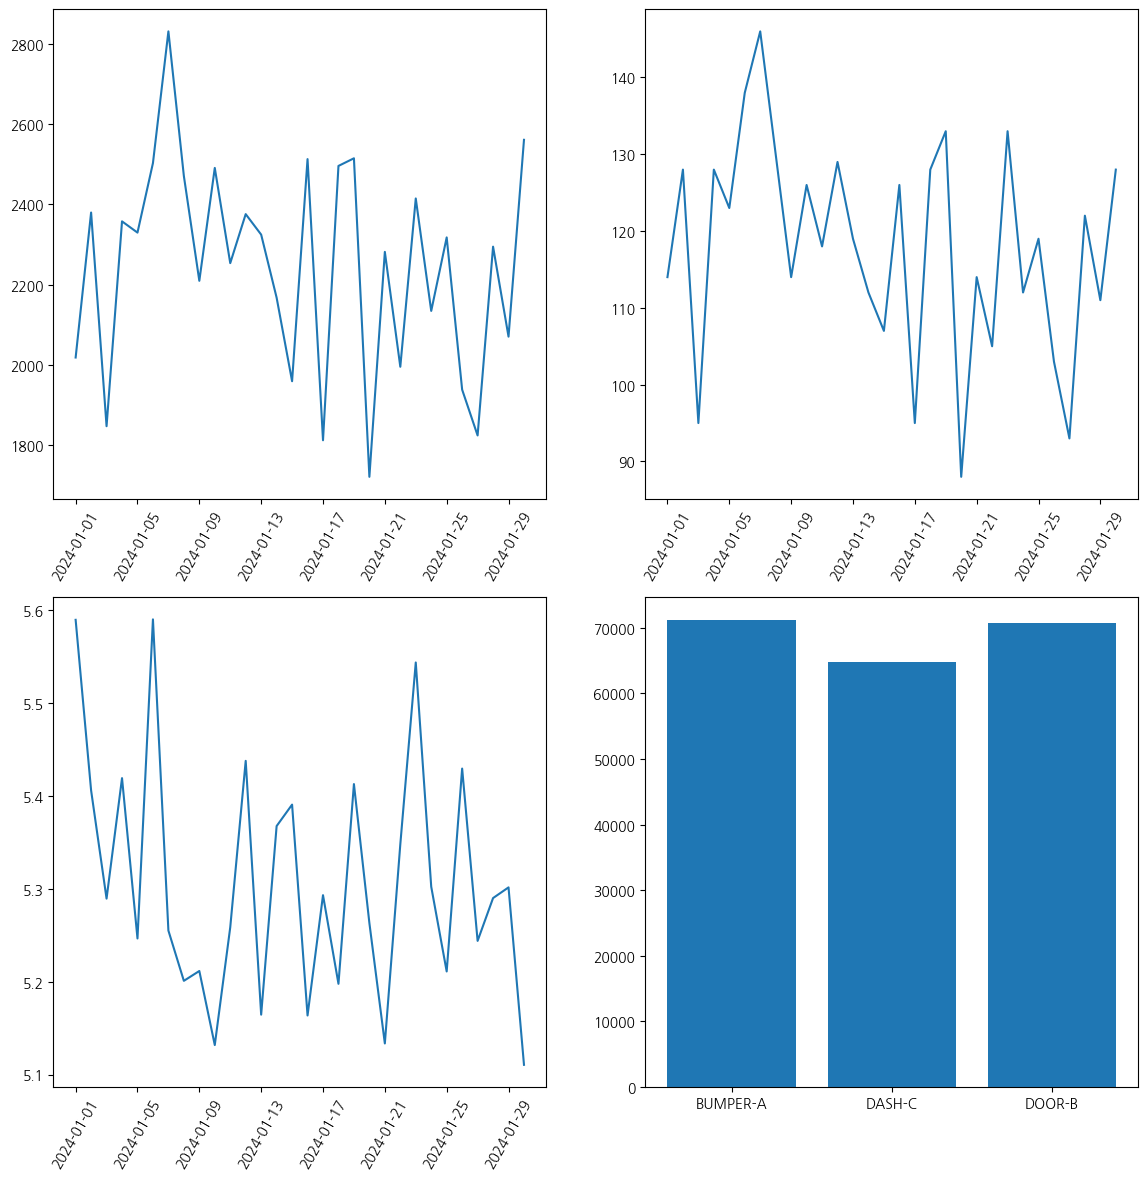

In [ ]:
# 1. 생산량 추이
plt.figure(figsize=(14, 14))
plt.subplot(2, 2, 1)
plt.plot(daily_stats.index, daily_stats['actual_quantity'])

plt.xticks(rotation=60)

# 2. 불량수 추이
plt.subplot(2, 2, 2)
plt.plot(daily_stats.index, daily_stats['defect_quantity'])

plt.xticks(rotation=60)

# 3. 평균 불량률
plt.subplot(2, 2, 3)
plt.plot(daily_stats.index, daily_stats['defect_rate'])

plt.xticks(rotation=60)

# 4. 제품별 총 생산량
plt.subplot(2, 2, 4)
plt.bar(prod_qty.index, prod_qty.values)

plt.show()

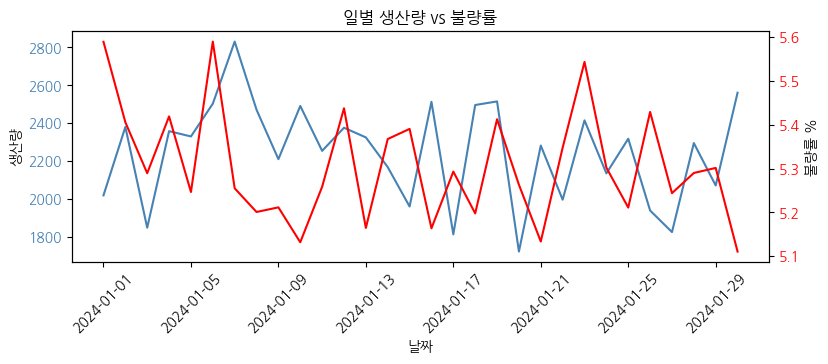

In [47]:
# 기본 이중 축
# 왼쪽 y축: 생산량
# 오른쪽 y축: 불량률
fig, ax1 = plt.subplots(figsize=(9, 3))

ax1.set_xlabel('날짜')
ax1.set_ylabel('생산량')
ax1.plot(daily_stats.index, daily_stats['actual_quantity'], color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.tick_params(axis='x', rotation=45)

ax2 = ax1.twinx()
ax2.set_ylabel('불량률 %')
ax2.plot(daily_stats.index, daily_stats['defect_rate'], color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('일별 생산량 vs 불량률')

plt.show()

In [20]:
prod_stats = production_df.groupby('product_code').agg({'actual_quantity':'sum',
                                                        'defect_rate':'mean'})
prod_stats

,actual_quantity,defect_rate
product_code,,
BUMPER-A,71135,10.376590
DASH-C,64741,10.121681
DOOR-B,70728,10.158986


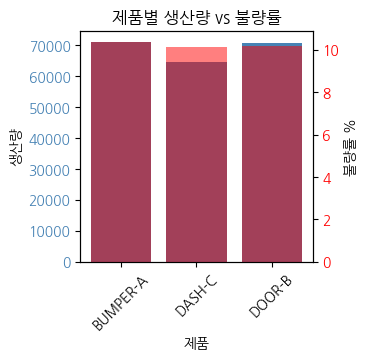

In [29]:
fig, ax1 = plt.subplots(figsize=(3, 3))

ax1.set_xlabel('제품')
ax1.set_ylabel('생산량')
ax1.bar(prod_stats.index, prod_stats['actual_quantity'], color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.tick_params(axis='x', rotation=45)

ax2 = ax1.twinx()
ax2.set_ylabel('불량률 %')
ax2.bar(prod_stats.index, prod_stats['defect_rate'], color='red', alpha=0.5)
ax2.tick_params(axis='y', labelcolor='red')

plt.title('제품별 생산량 vs 불량률')

plt.show()

In [34]:
# 일별 불량률 -> 이동평균
daily_defect = production_df.groupby('production_date')['defect_rate'].mean().round(2)
daily_defect_3MA = daily_defect.rolling(window=3).mean().round(2)
daily_defect_7MA = daily_defect.rolling(window=7).mean().round(2)

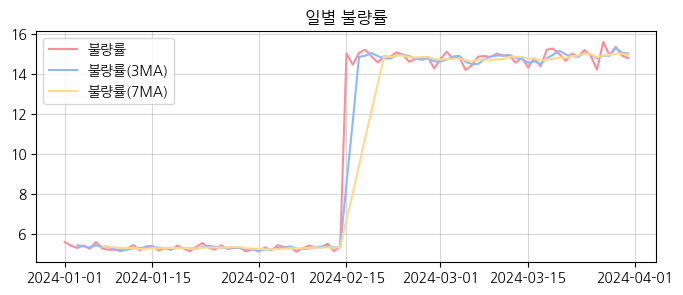

In [45]:
plt.figure(figsize=(8, 3))

plt.plot(daily_defect.index, daily_defect.values, label='불량률', color='#FF8C9B')
plt.plot(daily_defect_3MA.index, daily_defect_3MA.values, label='불량률(3MA)', color="#8CB8FF")
plt.plot(daily_defect_7MA.index, daily_defect_7MA.values, label='불량률(7MA)', color="#FFD98C")

plt.title('일별 불량률')
plt.legend(loc='upper left')
plt.grid(alpha=0.5)

plt.show()